In [1]:
import sys
sys.path.append("..")

In [2]:
import ash
from rdkit import Chem

ashpath: /home/arazthexd/miniforge3/envs/sqmvscreen2/lib/python3.10/site-packages/ash
Sys path: ['/home/arazthexd/miniforge3/envs/sqmvscreen2/lib/python3.10/site-packages/ash', '/home/arazthexd/projects/002_sqm', '/home/arazthexd/tools/dimorphite_dl', '/home/arazthexd/projects/002_sqm/xash_dev', '/home/arazthexd/miniforge3/envs/sqmvscreen2/lib/python310.zip', '/home/arazthexd/miniforge3/envs/sqmvscreen2/lib/python3.10', '/home/arazthexd/miniforge3/envs/sqmvscreen2/lib/python3.10/lib-dynload', '', '/home/arazthexd/miniforge3/envs/sqmvscreen2/lib/python3.10/site-packages', '/home/arazthexd/miniforge3/envs/sqmvscreen2/lib/python3.10/site-packages/pkasolver-0.3+18.gf38faba-py3.10.egg', '..']
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                                           ASH                                            
                              A MULTISCALE MODELLI

In [3]:
from molsberry.core import Pipeline, InputBlock, OutputBlock
from molsberry.core import SDFPathRep, PDBPathRep, StringRep
from molsberry.core import LigandData, ProteinData, LocationData, StringData

import molsberry.modules.ash as ash_
import molsberry.modules.mopac as mopac_
import molsberry.modules.rdkit as rdkit_
from molsberry.modules.generic import RDKitProteinLigandSplitter, RDKitBondOrderAssigner
from molsberry.modules.rdkit import RDKitMolRep

In [6]:
class ASHTest(Pipeline):
    name = "ashtest"
    display_name = "Ash Test"
    def build(self):
        self.ash_theory = ash.xTBTheory(numcores=8)
        self.add_block(InputBlock(["complex", "smiles"]), "input")
        self.add_block(RDKitProteinLigandSplitter(), "plsplit")
        self.add_block(RDKitBondOrderAssigner(), "bondassign")
        self.add_block(rdkit_.RDKitHydrogenAdder(), "hadder")
        self.add_block(ash_.ASHFragmentOptimizer(self.ash_theory), "opt")
        self.add_block(ash_.ASHSinglePointCalculator(self.ash_theory), "spcalc")
        self.add_block(OutputBlock(["energy"]), "output")
        self.add_connection("input", "complex", "plsplit", "complex")
        self.add_connection("plsplit", "ligands", "bondassign", "molecules")
        self.add_connection("input", "smiles", "bondassign", "smiles")
        self.add_connection("bondassign", "molecules", "hadder", "molecules")
        self.add_connection("hadder", "molecules", "opt", "fragments")
        self.add_connection("opt", "fragments", "spcalc", "fragments")
        self.add_connection("spcalc", "energy", "output", "energy")

smi = "C1=CC(=C[N+](=C1)[C@H]2[C@@H]([C@@H]([C@H](O2)COP(=O)(O)OP(=O)(O)OC[C@@H]3[C@H]([C@H]([C@@H](O3)N4C=NC5=C(N=CN=C54)N)O)O)O)O)C(=O)N"
smirep = StringRep(smi)
comprep = PDBPathRep("/home/arazthexd/projects/002_sqm/data/targets/kguD.pdb")
ASHTest().execute(
    complex=LigandData(comprep), 
    smiles=StringData(smirep)
)["energy"].get_representation_content()[0]



                           #########################                            
                           #                       #                            
                           #     xTB INTERFACE     #                            
                           #                       #                            
                           #########################                            
Runmode: inputfile
xTB method: GFN1
xTB object numcores: 8
 No xtbdir argument passed to xTBTheory. Attempting to find xtbdir variable inside settings_ash 
settings_ash.settings_dict: {'debugflag': False, 'load_julia': False, 'julia_library': 'pythoncall', 'use_ANSI_color': False, 'print_logo': False, 'print_input': False, 'scale': 1.0, 'tol': 0.2, 'conndepth': 10, 'connectivity_code': 'julia', 'nonbondedMM_code': 'julia', 'print_exit_footer': False, 'print_full_timings': False}
 Found no xtbdir variable in ash.settings_ash module either. 
 Found xtb in path. Setting xtbdir to: /home/ar

[09:14:00] WARNING: More than one matching pattern found - picking one

geometric-optimize called with the following command line:
/home/arazthexd/miniforge3/envs/sqmvscreen2/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/arazthexd/.local/share/jupyter/runtime/kernel-v352036848a0d8e49cf4e5f556c8408e3eb090bbc6.json

                                        ())))))))))))))))/                     
                                    ())))))))))))))))))))))))),                
                                *)))))))))))))))))))))))))))))))))             
                        #,    ()))))))))/                .)))))))))),          
                      #%%%%,  ())))))                        .))))))))*        
                      *%%%%%%,  ))              ..              ,))))))).      
                        *%%%%%%,         ***************/.        .)))))))     
                #%%/      (%%%%%%,    /*********************.       )))))))    
              .%%%%%%#      *


------------STARTING XTB INTERFACE-------------
Object-label: None
Run-label: None
Using inputfile-based xTB interface
Creating inputfile: xtb_.xyz
Wrote XYZ file:  xtb_.xyz
------------Running xTB-------------
Running xtB using 8 cores
...
Running xtb with these arguments: ['/home/arazthexd/miniforge3/envs/sqmvscreen2/bin/xtb', 'xtb_.xyz', '--gfn', '1', '--grad', '--chrg', '1', '--uhf', '0', '--iterations', '500', '--etemp', '300', '--acc', '0.1', '--parallel', '8']


Step    0 : Gradient = 1.061e-01/2.264e-01 (rms/max) Energy = -135.8493858513
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 8.21776e-01 8.23208e-01 8.44774e-01


xTB job succeeded.
------------xTB calculation done-----
xtb energy : -135.84938585133
------------ENDING XTB-INTERFACE-------------

-------------------------------------------------------------
Time to calculate step (xTB run): 0.374 seconds, 0.0 minutes.
-------------------------------------------------------------

------------STARTING XTB INTERFACE-------------
Object-label: None
Run-label: None
Using inputfile-based xTB interface
Creating inputfile: xtb_.xyz
Wrote XYZ file:  xtb_.xyz
------------Running xTB-------------
Running xtB using 8 cores
...
Running xtb with these arguments: ['/home/arazthexd/miniforge3/envs/sqmvscreen2/bin/xtb', 'xtb_.xyz', '--gfn', '1', '--grad', '--chrg', '1', '--uhf', '0', '--iterations', '500', '--etemp', '300', '--acc', '0.1', '--parallel', '8']


Step    1 : Displace = 9.173e-02/2.101e-01 (rms/max) Trust = 1.000e-01 (=) Grad = 9.020e-02/2.011e-01 (rms/max) E (change) = -136.0487637241 (-1.994e-01) Quality = 1.122
Hessian Eigenvalues: 2.29600e-02 2.30000e-02 2.30000e-02 ... 8.21767e-01 8.23560e-01 8.47263e-01


xTB job succeeded.
------------xTB calculation done-----
xtb energy : -136.04876372408
------------ENDING XTB-INTERFACE-------------

-------------------------------------------------------------
Time to calculate step (xTB run): 0.250 seconds, 0.0 minutes.
-------------------------------------------------------------

------------STARTING XTB INTERFACE-------------
Object-label: None
Run-label: None
Using inputfile-based xTB interface
Creating inputfile: xtb_.xyz
Wrote XYZ file:  xtb_.xyz
------------Running xTB-------------
Running xtB using 8 cores
...
Running xtb with these arguments: ['/home/arazthexd/miniforge3/envs/sqmvscreen2/bin/xtb', 'xtb_.xyz', '--gfn', '1', '--grad', '--chrg', '1', '--uhf', '0', '--iterations', '500', '--etemp', '300', '--acc', '0.1', '--parallel', '8']


Step    2 : Displace = 1.504e-01/3.565e-01 (rms/max) Trust = 1.414e-01 (+) Grad = 6.523e-02/1.422e-01 (rms/max) E (change) = -136.2050694834 (-1.563e-01) Quality = 0.944
Hessian Eigenvalues: 2.29657e-02 2.30000e-02 2.30000e-02 ... 8.21822e-01 8.24081e-01 8.50258e-01


xTB job succeeded.
------------xTB calculation done-----
xtb energy : -136.20506948335
------------ENDING XTB-INTERFACE-------------

-------------------------------------------------------------
Time to calculate step (xTB run): 0.253 seconds, 0.0 minutes.
-------------------------------------------------------------

------------STARTING XTB INTERFACE-------------
Object-label: None
Run-label: None
Using inputfile-based xTB interface
Creating inputfile: xtb_.xyz
Wrote XYZ file:  xtb_.xyz
------------Running xTB-------------
Running xtB using 8 cores
...
Running xtb with these arguments: ['/home/arazthexd/miniforge3/envs/sqmvscreen2/bin/xtb', 'xtb_.xyz', '--gfn', '1', '--grad', '--chrg', '1', '--uhf', '0', '--iterations', '500', '--etemp', '300', '--acc', '0.1', '--parallel', '8']


Step    3 : Displace = 1.942e-01/4.542e-01 (rms/max) Trust = 2.000e-01 (+) Grad = 4.612e-02/9.147e-02 (rms/max) E (change) = -136.2952688514 (-9.020e-02) Quality = 0.965
Hessian Eigenvalues: 2.29392e-02 2.30000e-02 2.30000e-02 ... 8.22462e-01 8.40895e-01 9.17318e-01


xTB job succeeded.
------------xTB calculation done-----
xtb energy : -136.29526885143
------------ENDING XTB-INTERFACE-------------

-------------------------------------------------------------
Time to calculate step (xTB run): 0.241 seconds, 0.0 minutes.
-------------------------------------------------------------

------------STARTING XTB INTERFACE-------------
Object-label: None
Run-label: None
Using inputfile-based xTB interface
Creating inputfile: xtb_.xyz
Wrote XYZ file:  xtb_.xyz
------------Running xTB-------------
Running xtB using 8 cores
...
Running xtb with these arguments: ['/home/arazthexd/miniforge3/envs/sqmvscreen2/bin/xtb', 'xtb_.xyz', '--gfn', '1', '--grad', '--chrg', '1', '--uhf', '0', '--iterations', '500', '--etemp', '300', '--acc', '0.1', '--parallel', '8']


Step    4 : Displace = 2.834e-01/6.384e-01 (rms/max) Trust = 2.828e-01 (+) Grad = 3.409e-02/7.798e-02 (rms/max) E (change) = -136.3706167968 (-7.535e-02) Quality = 1.014
Hessian Eigenvalues: 2.27407e-02 2.30000e-02 2.30000e-02 ... 8.22710e-01 8.47736e-01 1.07187e+00


xTB job succeeded.
------------xTB calculation done-----
xtb energy : -136.3706167968
------------ENDING XTB-INTERFACE-------------

-------------------------------------------------------------
Time to calculate step (xTB run): 0.239 seconds, 0.0 minutes.
-------------------------------------------------------------

------------STARTING XTB INTERFACE-------------
Object-label: None
Run-label: None
Using inputfile-based xTB interface
Creating inputfile: xtb_.xyz
Wrote XYZ file:  xtb_.xyz
------------Running xTB-------------
Running xtB using 8 cores
...
Running xtb with these arguments: ['/home/arazthexd/miniforge3/envs/sqmvscreen2/bin/xtb', 'xtb_.xyz', '--gfn', '1', '--grad', '--chrg', '1', '--uhf', '0', '--iterations', '500', '--etemp', '300', '--acc', '0.1', '--parallel', '8']


Step    5 : Displace = 3.013e-01/6.545e-01 (rms/max) Trust = 3.000e-01 (+) Grad = 2.899e-02/6.110e-02 (rms/max) E (change) = -136.4322451808 (-6.163e-02) Quality = 1.047


xTB job succeeded.
------------xTB calculation done-----
xtb energy : -136.43224518082
------------ENDING XTB-INTERFACE-------------

-------------------------------------------------------------
Time to calculate step (xTB run): 0.234 seconds, 0.0 minutes.
-------------------------------------------------------------


Hessian Eigenvalues: 1.86334e-02 2.30000e-02 2.30000e-02 ... 8.22785e-01 8.56459e-01 1.06254e+00



------------STARTING XTB INTERFACE-------------
Object-label: None
Run-label: None
Using inputfile-based xTB interface
Creating inputfile: xtb_.xyz
Wrote XYZ file:  xtb_.xyz
------------Running xTB-------------
Running xtB using 8 cores
...
Running xtb with these arguments: ['/home/arazthexd/miniforge3/envs/sqmvscreen2/bin/xtb', 'xtb_.xyz', '--gfn', '1', '--grad', '--chrg', '1', '--uhf', '0', '--iterations', '500', '--etemp', '300', '--acc', '0.1', '--parallel', '8']


Step    6 : Displace = 3.005e-01/6.402e-01 (rms/max) Trust = 3.000e-01 (=) Grad = 2.735e-02/6.943e-02 (rms/max) E (change) = -136.4798209164 (-4.758e-02) Quality = 0.809
Hessian Eigenvalues: 2.01142e-02 2.30000e-02 2.30000e-02 ... 8.43886e-01 8.74055e-01 1.17287e+00


xTB job succeeded.
------------xTB calculation done-----
xtb energy : -136.47982091644
------------ENDING XTB-INTERFACE-------------

-------------------------------------------------------------
Time to calculate step (xTB run): 0.245 seconds, 0.0 minutes.
-------------------------------------------------------------

------------STARTING XTB INTERFACE-------------
Object-label: None
Run-label: None
Using inputfile-based xTB interface
Creating inputfile: xtb_.xyz
Wrote XYZ file:  xtb_.xyz
------------Running xTB-------------
Running xtB using 8 cores
...
Running xtb with these arguments: ['/home/arazthexd/miniforge3/envs/sqmvscreen2/bin/xtb', 'xtb_.xyz', '--gfn', '1', '--grad', '--chrg', '1', '--uhf', '0', '--iterations', '500', '--etemp', '300', '--acc', '0.1', '--parallel', '8']


Step    7 : Displace = 3.033e-01/6.307e-01 (rms/max) Trust = 3.000e-01 (=) Grad = 2.549e-02/5.912e-02 (rms/max) E (change) = -136.5348486538 (-5.503e-02) Quality = 1.022


xTB job succeeded.
------------xTB calculation done-----
xtb energy : -136.53484865377
------------ENDING XTB-INTERFACE-------------

-------------------------------------------------------------
Time to calculate step (xTB run): 0.215 seconds, 0.0 minutes.
-------------------------------------------------------------


Hessian Eigenvalues: 1.39617e-02 2.30000e-02 2.30000e-02 ... 8.51445e-01 9.12148e-01 2.00933e+00



------------STARTING XTB INTERFACE-------------
Object-label: None
Run-label: None
Using inputfile-based xTB interface
Creating inputfile: xtb_.xyz
Wrote XYZ file:  xtb_.xyz
------------Running xTB-------------
Running xtB using 8 cores
...
Running xtb with these arguments: ['/home/arazthexd/miniforge3/envs/sqmvscreen2/bin/xtb', 'xtb_.xyz', '--gfn', '1', '--grad', '--chrg', '1', '--uhf', '0', '--iterations', '500', '--etemp', '300', '--acc', '0.1', '--parallel', '8']


Step    8 : Displace = 2.982e-01/6.136e-01 (rms/max) Trust = 3.000e-01 (=) Grad = 2.719e-02/8.974e-02 (rms/max) E (change) = -136.5899613073 (-5.511e-02) Quality = 1.032


xTB job succeeded.
------------xTB calculation done-----
xtb energy : -136.58996130732
------------ENDING XTB-INTERFACE-------------

-------------------------------------------------------------
Time to calculate step (xTB run): 0.224 seconds, 0.0 minutes.
-------------------------------------------------------------


Hessian Eigenvalues: 6.28889e-03 2.30000e-02 2.30000e-02 ... 8.45221e-01 9.11011e-01 3.09177e+00



------------STARTING XTB INTERFACE-------------
Object-label: None
Run-label: None
Using inputfile-based xTB interface
Creating inputfile: xtb_.xyz
Wrote XYZ file:  xtb_.xyz
------------Running xTB-------------
Running xtB using 8 cores
...
Running xtb with these arguments: ['/home/arazthexd/miniforge3/envs/sqmvscreen2/bin/xtb', 'xtb_.xyz', '--gfn', '1', '--grad', '--chrg', '1', '--uhf', '0', '--iterations', '500', '--etemp', '300', '--acc', '0.1', '--parallel', '8']
xTB job succeeded.
------------xTB calculation done-----
xtb energy : -136.64810553982
------------ENDING XTB-INTERFACE-------------

-------------------------------------------------------------
Time to calculate step (xTB run): 0.188 seconds, 0.0 minutes.
-------------------------------------------------------------


Step    9 : Displace = 3.062e-01/5.948e-01 (rms/max) Trust = 3.000e-01 (=) Grad = 2.533e-02/8.333e-02 (rms/max) E (change) = -136.6481055398 (-5.814e-02) Quality = 0.873
Hessian Eigenvalues: 1.29589e-02 2.30000e-02 2.30000e-02 ... 8.73240e-01 9.65834e-01 4.17351e+00



------------STARTING XTB INTERFACE-------------
Object-label: None
Run-label: None
Using inputfile-based xTB interface
Creating inputfile: xtb_.xyz
Wrote XYZ file:  xtb_.xyz
------------Running xTB-------------
Running xtB using 8 cores
...
Running xtb with these arguments: ['/home/arazthexd/miniforge3/envs/sqmvscreen2/bin/xtb', 'xtb_.xyz', '--gfn', '1', '--grad', '--chrg', '1', '--uhf', '0', '--iterations', '500', '--etemp', '300', '--acc', '0.1', '--parallel', '8']
xTB job succeeded.
------------xTB calculation done-----
xtb energy : -136.68242188679
------------ENDING XTB-INTERFACE-------------

-------------------------------------------------------------
Time to calculate step (xTB run): 0.192 seconds, 0.0 minutes.
-------------------------------------------------------------


Step   10 : Displace = 1.583e-01/3.096e-01 (rms/max) Trust = 3.000e-01 (=) Grad = 2.103e-02/6.976e-02 (rms/max) E (change) = -136.6824218868 (-3.432e-02) Quality = 1.058
Hessian Eigenvalues: 9.36790e-03 2.30000e-02 2.30000e-02 ... 8.86176e-01 1.07101e+00 1.00538e+01



------------STARTING XTB INTERFACE-------------
Object-label: None
Run-label: None
Using inputfile-based xTB interface
Creating inputfile: xtb_.xyz
Wrote XYZ file:  xtb_.xyz
------------Running xTB-------------
Running xtB using 8 cores
...
Running xtb with these arguments: ['/home/arazthexd/miniforge3/envs/sqmvscreen2/bin/xtb', 'xtb_.xyz', '--gfn', '1', '--grad', '--chrg', '1', '--uhf', '0', '--iterations', '500', '--etemp', '300', '--acc', '0.1', '--parallel', '8']
xTB job succeeded.
------------xTB calculation done-----
xtb energy : -136.70702124814
------------ENDING XTB-INTERFACE-------------

-------------------------------------------------------------
Time to calculate step (xTB run): 0.193 seconds, 0.0 minutes.
-------------------------------------------------------------


Step   11 : Displace = 1.605e-01/2.837e-01 (rms/max) Trust = 3.000e-01 (=) Grad = 2.339e-02/5.974e-02 (rms/max) E (change) = -136.7070212481 (-2.460e-02) Quality = 0.579
Hessian Eigenvalues: 2.06143e-02 2.30000e-02 2.30000e-02 ... 8.82084e-01 1.03157e+00 1.18966e+01



------------STARTING XTB INTERFACE-------------
Object-label: None
Run-label: None
Using inputfile-based xTB interface
Creating inputfile: xtb_.xyz
Wrote XYZ file:  xtb_.xyz
------------Running xTB-------------
Running xtB using 8 cores
...
Running xtb with these arguments: ['/home/arazthexd/miniforge3/envs/sqmvscreen2/bin/xtb', 'xtb_.xyz', '--gfn', '1', '--grad', '--chrg', '1', '--uhf', '0', '--iterations', '500', '--etemp', '300', '--acc', '0.1', '--parallel', '8']
xTB job succeeded.
------------xTB calculation done-----
xtb energy : -136.73699961161
------------ENDING XTB-INTERFACE-------------

-------------------------------------------------------------
Time to calculate step (xTB run): 0.200 seconds, 0.0 minutes.
-------------------------------------------------------------


Step   12 : Displace = 2.988e-01/6.088e-01 (rms/max) Trust = 3.000e-01 (=) Grad = 3.434e-02/1.417e-01 (rms/max) E (change) = -136.7369996116 (-2.998e-02) Quality = 0.683
Hessian Eigenvalues: 6.22897e-03 2.29511e-02 2.30000e-02 ... 9.69631e-01 2.36906e+00 1.60564e+01



------------STARTING XTB INTERFACE-------------
Object-label: None
Run-label: None
Using inputfile-based xTB interface
Creating inputfile: xtb_.xyz
Wrote XYZ file:  xtb_.xyz
------------Running xTB-------------
Running xtB using 8 cores
...
Running xtb with these arguments: ['/home/arazthexd/miniforge3/envs/sqmvscreen2/bin/xtb', 'xtb_.xyz', '--gfn', '1', '--grad', '--chrg', '1', '--uhf', '0', '--iterations', '500', '--etemp', '300', '--acc', '0.1', '--parallel', '8']
xTB job succeeded.
------------xTB calculation done-----
xtb energy : -136.75627159445
------------ENDING XTB-INTERFACE-------------

-------------------------------------------------------------
Time to calculate step (xTB run): 0.191 seconds, 0.0 minutes.
-------------------------------------------------------------


Step   13 : Displace = 6.940e-02/1.878e-01 (rms/max) Trust = 3.000e-01 (=) Grad = 2.104e-02/5.472e-02 (rms/max) E (change) = -136.7562715944 (-1.927e-02) Quality = 0.232
Hessian Eigenvalues: 6.92361e-03 2.29499e-02 2.30000e-02 ... 9.73314e-01 2.66206e+00 1.44841e+01



------------STARTING XTB INTERFACE-------------
Object-label: None
Run-label: None
Using inputfile-based xTB interface
Creating inputfile: xtb_.xyz
Wrote XYZ file:  xtb_.xyz
------------Running xTB-------------
Running xtB using 8 cores
...
Running xtb with these arguments: ['/home/arazthexd/miniforge3/envs/sqmvscreen2/bin/xtb', 'xtb_.xyz', '--gfn', '1', '--grad', '--chrg', '1', '--uhf', '0', '--iterations', '500', '--etemp', '300', '--acc', '0.1', '--parallel', '8']
xTB job succeeded.
------------xTB calculation done-----
xtb energy : -136.76070807038
------------ENDING XTB-INTERFACE-------------

-------------------------------------------------------------
Time to calculate step (xTB run): 0.200 seconds, 0.0 minutes.
-------------------------------------------------------------


Step   14 : Displace = 1.825e-02/3.900e-02 (rms/max) Trust = 3.470e-02 (-) Grad = 1.732e-02/4.051e-02 (rms/max) E (change) = -136.7607080704 (-4.436e-03) Quality = 0.967
Hessian Eigenvalues: 6.92361e-03 2.29499e-02 2.30000e-02 ... 9.73314e-01 2.66206e+00 1.44841e+01
Converged! =D

    #==========================================================================#
    #| If this code has benefited your research, please support us by citing: |#
    #|                                                                        |#
    #| Wang, L.-P.; Song, C.C. (2016) "Geometry optimization made simple with |#
    #| translation and rotation coordinates", J. Chem, Phys. 144, 214108.     |#
    #| http://dx.doi.org/10.1063/1.4952956                                    |#
    #==========================================================================#
    Time elapsed since start of run_optimizer: 35.396 seconds


Replacing coordinates in fragment.
Creating/Updating fragment attributes...
Number of Atoms in fragment: 44
Formula: O14P2N7C21
Label: None
Charge: 1 Mult: 1

--------------------------------------------------------------------------------
Printing fragment to disk:  Fragment-optimized.ygg

Wrote XYZ file:  Fragment-optimized.xyz


Writing to disk defined attributes of ASH_Results dataclass
Results object data:
label : Optimizer
energy : -136.76070807038


TypeError: 'list' object is not callable

In [6]:
from rdkit.Chem import AllChem
from typing import List

comp = Chem.MolFromPDBFile("/home/arazthexd/projects/002_sqm/data/targets/kguD.pdb")
molfrags: List[Chem.Mol] = Chem.GetMolFrags(comp, asMols=True)
lig = Chem.Mol()
prot = Chem.Mol()
for molfrag in molfrags:
    if molfrag.GetAtomWithIdx(0).GetPDBResidueInfo().GetIsHeteroAtom():
        lig = Chem.CombineMols(lig, molfrag)
    else:
        prot = Chem.CombineMols(prot, molfrag)
lig = Chem.GetMolFrags(comp, asMols=True)[1]
lig_smi = "C1=CC(=C[N+](=C1)[C@H]2[C@@H]([C@@H]([C@H](O2)COP(=O)(O)OP(=O)(O)OC[C@@H]3[C@H]([C@H]([C@@H](O3)N4C=NC5=C(N=CN=C54)N)O)O)O)O)C(=O)N"
lig = AllChem.AssignBondOrdersFromTemplate(Chem.MolFromSmiles(lig_smi), lig)
lig = Chem.AddHs(lig, addCoords=True, addResidueInfo=True)
lig_frag = ash.Fragment(
    elems=[a.GetSymbol() for a in lig.GetAtoms()],
    coords=lig.GetConformer().GetPositions(),
    mult=1,
    charge=Chem.GetFormalCharge(lig),
    label="lig",
    printlevel=0
)

fragrep = ash_.ASHFragmentRep(lig_frag)
ASHTest().execute(fragments=LigandData(fragrep))["energy"].get_representation_content()[0]

[16:41:09] WARNING: More than one matching pattern found - picking one





                           #########################                            
                           #                       #                            
                           #     xTB INTERFACE     #                            
                           #                       #                            
                           #########################                            
Runmode: inputfile
xTB method: GFN1
xTB object numcores: 8
 No xtbdir argument passed to xTBTheory. Attempting to find xtbdir variable inside settings_ash 
settings_ash.settings_dict: {'debugflag': False, 'load_julia': False, 'julia_library': 'pythoncall', 'use_ANSI_color': False, 'print_logo': False, 'print_input': False, 'scale': 1.0, 'tol': 0.2, 'conndepth': 10, 'connectivity_code': 'julia', 'nonbondedMM_code': 'julia', 'print_exit_footer': False, 'print_full_timings': False}
 Found no xtbdir variable in ash.settings_ash module either. 
 Found xtb in path. Setting xtbdir to: /home/ar

-152.81437062949

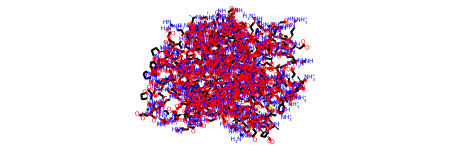

In [7]:
prot

In [1]:
import sys
sys.path.append("..")

In [2]:
import ash
from rdkit import Chem

ashpath: /home/arazthexd/miniforge3/envs/sqmvscreen2/lib/python3.10/site-packages/ash
Sys path: ['/home/arazthexd/miniforge3/envs/sqmvscreen2/lib/python3.10/site-packages/ash', '/home/arazthexd/projects/002_sqm', '/home/arazthexd/tools/dimorphite_dl', '/home/arazthexd/projects/002_sqm/xash_dev', '/home/arazthexd/miniforge3/envs/sqmvscreen2/lib/python310.zip', '/home/arazthexd/miniforge3/envs/sqmvscreen2/lib/python3.10', '/home/arazthexd/miniforge3/envs/sqmvscreen2/lib/python3.10/lib-dynload', '', '/home/arazthexd/miniforge3/envs/sqmvscreen2/lib/python3.10/site-packages', '/home/arazthexd/miniforge3/envs/sqmvscreen2/lib/python3.10/site-packages/pkasolver-0.3+18.gf38faba-py3.10.egg', '..']
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                                           ASH                                            
                              A MULTISCALE MODELLI

In [19]:
from rdkit.Chem import AllChem
from rdkit.Chem import rdForceFieldHelpers

comp = Chem.MolFromPDBFile("/home/arazthexd/projects/002_sqm/data/targets/kguD.pdb")
prot, lig = Chem.GetMolFrags(comp, asMols=True)
lig_smi = "C1=CC(=C[N+](=C1)[C@H]2[C@@H]([C@@H]([C@H](O2)COP(=O)(O)OP(=O)(O)OC[C@@H]3[C@H]([C@H]([C@@H](O3)N4C=NC5=C(N=CN=C54)N)O)O)O)O)C(=O)N"
lig = AllChem.AssignBondOrdersFromTemplate(Chem.MolFromSmiles(lig_smi), lig)
lig = Chem.AddHs(lig, addCoords=True, addResidueInfo=True)
rdForceFieldHelpers.MMFFOptimizeMolecule(lig)
lig_frag = ash.Fragment(
    elems=[a.GetSymbol() for a in lig.GetAtoms()],
    coords=lig.GetConformer().GetPositions(),
    mult=1,
    charge=Chem.GetFormalCharge(lig),
    label="lig"
)


--------------------------------------------------------------------------------
                                New ASH fragment                                
--------------------------------------------------------------------------------

ASH Fragment creation
Creating/Updating fragment attributes...
Number of Atoms in fragment: 72
Formula: C21P2H28N7O14
Label: lig
Charge: 1 Mult: 1

--------------------------------------------------------------------------------


[07:58:34] WARNING: More than one matching pattern found - picking one



In [20]:
lig_frag

ASH Fragment object
Number of Atoms in fragment: 72
Formula: C21P2H28N7O14
Label: lig
Charge: 1 Mult: 1
Do fragment.info() for more info on fragment


ASH fragment

In [22]:
theory = ash.xTBTheory(numcores=8)
print(lig_frag.coords)

results = ash.Optimizer(fragment=lig_frag, theory=theory, convergence_setting='SuperLoose', printlevel=0, maxiter=4)

print(lig_frag.coords)

geometric-optimize called with the following command line:


/home/arazthexd/miniforge3/envs/sqmvscreen2/lib/python3.10/site-packages/ipykernel_launcher.py --f=/home/arazthexd/.local/share/jupyter/runtime/kernel-v3770bfae97f9ff2d0eef10a10f05b525f93128476.json

                                        ())))))))))))))))/                     
                                    ())))))))))))))))))))))))),                
                                *)))))))))))))))))))))))))))))))))             
                        #,    ()))))))))/                .)))))))))),          
                      #%%%%,  ())))))                        .))))))))*        
                      *%%%%%%,  ))              ..              ,))))))).      
                        *%%%%%%,         ***************/.        .)))))))     
                #%%/      (%%%%%%,    /*********************.       )))))))    
              .%%%%%%#      *%%%%%%,  *******/,     **********,      .))))))   
                .%%%%%%/      *%%%%%%,  **              ********      .))))))  




                           #########################                            
                           #                       #                            
                           #     xTB INTERFACE     #                            
                           #                       #                            
                           #########################                            
Runmode: inputfile
xTB method: GFN1
xTB object numcores: 8
 No xtbdir argument passed to xTBTheory. Attempting to find xtbdir variable inside settings_ash 
settings_ash.settings_dict: {'debugflag': False, 'load_julia': False, 'julia_library': 'pythoncall', 'use_ANSI_color': False, 'print_logo': False, 'print_input': False, 'scale': 1.0, 'tol': 0.2, 'conndepth': 10, 'connectivity_code': 'julia', 'nonbondedMM_code': 'julia', 'print_exit_footer': False, 'print_full_timings': False}
 Found no xtbdir variable in ash.settings_ash module either. 
 Found xtb in path. Setting xtbdir to: /home/ar

216 internal coordinates being used (instead of 216 Cartesians)
Internal coordinate system (atoms numbered from 1):
Distance 1-7
Distance 1-13
Distance 1-21
Distance 1-34
Distance 2-8
Distance 2-16
Distance 2-21
Distance 2-35
Distance 3-10
Distance 3-28
Distance 3-44
Distance 3-45
Distance 4-6
Distance 4-11
Distance 4-29
Distance 4-46
Distance 5-9
Distance 5-36
Distance 6-12
Distance 6-37
Distance 9-20
Distance 9-47
Distance 10-14
Distance 10-17
Distance 10-48
Distance 11-15
Distance 11-18
Distance 11-49
Distance 12-19
Distance 12-50
Distance 13-51
Distance 14-52
Distance 15-53
Distance 16-54
Distance 17-22
Distance 17-25
Distance 17-55
Distance 18-23
Distance 18-26
Distance 18-56
Distance 19-27
Distance 19-39
Distance 20-24
Distance 22-57
Distance 23-58
Distance 24-30
Distance 24-44
Distance 25-28
Distance 25-31
Distance 25-59
Distance 26-29
Distance 26-32
Distance 26-60
Distance 27-33
Distance 27-61
Distance 30-36
Distance 30-40
Distance 31-34
Distance 31-62
Distance 31-63
Distance 3


------------STARTING XTB INTERFACE-------------
Object-label: None
Run-label: None
Using inputfile-based xTB interface
Creating inputfile: xtb_.xyz
Wrote XYZ file:  xtb_.xyz
------------Running xTB-------------
Running xtB using 8 cores
...
Running xtb with these arguments: ['/home/arazthexd/miniforge3/envs/sqmvscreen2/bin/xtb', 'xtb_.xyz', '--gfn', '1', '--grad', '--chrg', '1', '--uhf', '0', '--iterations', '500', '--etemp', '300', '--acc', '0.1', '--parallel', '8']


Step    0 : Gradient = 2.076e-02/8.147e-02 (rms/max) Energy = -152.8832890703


xTB job succeeded.
------------xTB calculation done-----
xtb energy : -152.88328907034
------------ENDING XTB-INTERFACE-------------

-------------------------------------------------------------
Time to calculate step (xTB run): 0.258 seconds, 0.0 minutes.
-------------------------------------------------------------


Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 7.90313e-01 8.06778e-01 9.45063e-01



------------STARTING XTB INTERFACE-------------
Object-label: None
Run-label: None
Using inputfile-based xTB interface
Creating inputfile: xtb_.xyz
Wrote XYZ file:  xtb_.xyz
------------Running xTB-------------
Running xtB using 8 cores
...
Running xtb with these arguments: ['/home/arazthexd/miniforge3/envs/sqmvscreen2/bin/xtb', 'xtb_.xyz', '--gfn', '1', '--grad', '--chrg', '1', '--uhf', '0', '--iterations', '500', '--etemp', '300', '--acc', '0.1', '--parallel', '8']


Step    1 : Displace = 9.633e-02/1.820e-01 (rms/max) Trust = 1.000e-01 (=) Grad = 1.447e-02/5.494e-02 (rms/max) E (change) = -152.8984009204 (-1.511e-02) Quality = 1.057


xTB job succeeded.
------------xTB calculation done-----
xtb energy : -152.89840092042
------------ENDING XTB-INTERFACE-------------

-------------------------------------------------------------
Time to calculate step (xTB run): 0.283 seconds, 0.0 minutes.
-------------------------------------------------------------


Hessian Eigenvalues: 2.29696e-02 2.30000e-02 2.30000e-02 ... 7.52799e-01 8.01824e-01 9.38259e-01



------------STARTING XTB INTERFACE-------------
Object-label: None
Run-label: None
Using inputfile-based xTB interface
Creating inputfile: xtb_.xyz
Wrote XYZ file:  xtb_.xyz
------------Running xTB-------------
Running xtB using 8 cores
...
Running xtb with these arguments: ['/home/arazthexd/miniforge3/envs/sqmvscreen2/bin/xtb', 'xtb_.xyz', '--gfn', '1', '--grad', '--chrg', '1', '--uhf', '0', '--iterations', '500', '--etemp', '300', '--acc', '0.1', '--parallel', '8']


Step    2 : Displace = 1.507e-01/2.792e-01 (rms/max) Trust = 1.414e-01 (+) Grad = 7.645e-03/2.638e-02 (rms/max) E (change) = -152.9115311466 (-1.313e-02) Quality = 1.006


xTB job succeeded.
------------xTB calculation done-----
xtb energy : -152.91153114655
------------ENDING XTB-INTERFACE-------------

-------------------------------------------------------------
Time to calculate step (xTB run): 0.266 seconds, 0.0 minutes.
-------------------------------------------------------------


Hessian Eigenvalues: 2.29312e-02 2.30000e-02 2.30000e-02 ... 7.94417e-01 8.01948e-01 9.43329e-01



------------STARTING XTB INTERFACE-------------
Object-label: None
Run-label: None
Using inputfile-based xTB interface
Creating inputfile: xtb_.xyz
Wrote XYZ file:  xtb_.xyz
------------Running xTB-------------
Running xtB using 8 cores
...
Running xtb with these arguments: ['/home/arazthexd/miniforge3/envs/sqmvscreen2/bin/xtb', 'xtb_.xyz', '--gfn', '1', '--grad', '--chrg', '1', '--uhf', '0', '--iterations', '500', '--etemp', '300', '--acc', '0.1', '--parallel', '8']
xTB job succeeded.
------------xTB calculation done-----
xtb energy : -152.92098247062
------------ENDING XTB-INTERFACE-------------

-------------------------------------------------------------
Time to calculate step (xTB run): 0.268 seconds, 0.0 minutes.
-------------------------------------------------------------


Step    3 : Displace = 2.108e-01/3.684e-01 (rms/max) Trust = 2.000e-01 (+) Grad = 3.790e-03/1.096e-02 (rms/max) E (change) = -152.9209824706 (-9.451e-03) Quality = 1.045
Hessian Eigenvalues: 2.23839e-02 2.30000e-02 2.30000e-02 ... 8.01388e-01 8.20580e-01 9.43348e-01



------------STARTING XTB INTERFACE-------------
Object-label: None
Run-label: None
Using inputfile-based xTB interface
Creating inputfile: xtb_.xyz
Wrote XYZ file:  xtb_.xyz
------------Running xTB-------------
Running xtB using 8 cores
...
Running xtb with these arguments: ['/home/arazthexd/miniforge3/envs/sqmvscreen2/bin/xtb', 'xtb_.xyz', '--gfn', '1', '--grad', '--chrg', '1', '--uhf', '0', '--iterations', '500', '--etemp', '300', '--acc', '0.1', '--parallel', '8']


Step    4 : Displace = 2.903e-01/5.046e-01 (rms/max) Trust = 2.828e-01 (+) Grad = 4.294e-03/1.593e-02 (rms/max) E (change) = -152.9258701005 (-4.888e-03) Quality = 0.838


xTB job succeeded.
------------xTB calculation done-----
xtb energy : -152.92587010055
------------ENDING XTB-INTERFACE-------------

-------------------------------------------------------------
Time to calculate step (xTB run): 0.254 seconds, 0.0 minutes.
-------------------------------------------------------------


Hessian Eigenvalues: 1.83664e-02 2.30000e-02 2.30000e-02 ... 8.00794e-01 8.09131e-01 9.70594e-01



------------STARTING XTB INTERFACE-------------
Object-label: None
Run-label: None
Using inputfile-based xTB interface
Creating inputfile: xtb_.xyz
Wrote XYZ file:  xtb_.xyz
------------Running xTB-------------
Running xtB using 8 cores
...
Running xtb with these arguments: ['/home/arazthexd/miniforge3/envs/sqmvscreen2/bin/xtb', 'xtb_.xyz', '--gfn', '1', '--grad', '--chrg', '1', '--uhf', '0', '--iterations', '500', '--etemp', '300', '--acc', '0.1', '--parallel', '8']


Step    5 : Displace = 2.938e-01/5.421e-01 (rms/max) Trust = 3.000e-01 (+) Grad = 4.298e-03/1.679e-02 (rms/max) E (change) = -152.9298022197 (-3.932e-03) Quality = 0.886
Hessian Eigenvalues: 1.83664e-02 2.30000e-02 2.30000e-02 ... 8.00794e-01 8.09131e-01 9.70594e-01
Maximum iterations reached (4); increase --maxiter for more


xTB job succeeded.
------------xTB calculation done-----
xtb energy : -152.92980221971
------------ENDING XTB-INTERFACE-------------

-------------------------------------------------------------
Time to calculate step (xTB run): 0.239 seconds, 0.0 minutes.
-------------------------------------------------------------


GeomOptNotConvergedError: Optimizer.optimizeGeometry() failed to converge.

In [17]:
results.properties

In [10]:
theory = ash.xTBTheory(numcores=8)
results = ash.Singlepoint(fragment=lig_frag, theory=theory)



                           #########################                            
                           #                       #                            
                           #     xTB INTERFACE     #                            
                           #                       #                            
                           #########################                            
Runmode: inputfile
xTB method: GFN1
xTB object numcores: 8
 No xtbdir argument passed to xTBTheory. Attempting to find xtbdir variable inside settings_ash 
settings_ash.settings_dict: {'debugflag': False, 'load_julia': False, 'julia_library': 'pythoncall', 'use_ANSI_color': False, 'print_logo': False, 'print_input': True, 'scale': 1.0, 'tol': 0.1, 'conndepth': 10, 'connectivity_code': 'julia', 'nonbondedMM_code': 'julia', 'print_exit_footer': True, 'print_full_timings': True}
 Found no xtbdir variable in ash.settings_ash module either. 
 Found xtb in path. Setting xtbdir to: /home/arazt

In [ ]:
results.

TypeError: 'ASH_Results' object is not subscriptable

In [6]:
poc = Chem.MolFromPDBFile("new_poc.pdb")
poc_frag = ash.Fragment(pdbfile="new_poc.pdb", mult=1, charge=Chem.GetFormalCharge(poc))


--------------------------------------------------------------------------------
                                New ASH fragment                                
--------------------------------------------------------------------------------

ASH Fragment creation
read_pdbfile_openmm: Reading coordinates from PDB file 'new_poc.pdb' into fragment.
Creating/Updating fragment attributes...
Number of Atoms in fragment: 214
Formula: S1O42C127N44
Label: new_poc
Charge: 1 Mult: 1

--------------------------------------------------------------------------------


In [ ]:
ash.fragmen

In [ ]:
ashmol = ash.Fragment(pdbfile="/home/arazthexd/projects/002_sqm/new_poc.pdb")
theory = ash.xTBTheory(numcores=8)
ash.Singlepoint(fragment=ashmol, theory=theory, charge=0, mult=1)


--------------------------------------------------------------------------------
                                New ASH fragment                                
--------------------------------------------------------------------------------

ASH Fragment creation
read_pdbfile_openmm: Reading coordinates from PDB file '/home/arazthexd/projects/002_sqm/minimized.pdb' into fragment.
Creating/Updating fragment attributes...
Number of Atoms in fragment: 475
Formula: S1H251C137O42N44
Label: minimized
Charge: None Mult: None

--------------------------------------------------------------------------------


In [7]:
f.info()

ASH Fragment object
{'charge': None, 'mult': None, 'label': 'minimized', 'printlevel': 2, 'energy': None, 'elems': ['C', 'O', 'C', 'H', 'H', 'H', 'N', 'H', 'C', 'H', 'C', 'O', 'C', 'H', 'C', 'H', 'H', 'H', 'C', 'H', 'H', 'H', 'N', 'H', 'C', 'H', 'H', 'C', 'O', 'N', 'H', 'C', 'H', 'H', 'H', 'C', 'O', 'C', 'H', 'H', 'H', 'N', 'H', 'C', 'H', 'C', 'O', 'C', 'H', 'H', 'C', 'H', 'C', 'H', 'H', 'H', 'C', 'H', 'H', 'H', 'N', 'H', 'C', 'H', 'H', 'H', 'C', 'O', 'C', 'H', 'H', 'H', 'N', 'H', 'C', 'H', 'C', 'O', 'C', 'H', 'C', 'H', 'H', 'H', 'O', 'H', 'N', 'H', 'C', 'H', 'H', 'H', 'C', 'O', 'C', 'H', 'H', 'H', 'N', 'H', 'C', 'H', 'H', 'C', 'O', 'N', 'H', 'C', 'H', 'C', 'O', 'C', 'H', 'H', 'C', 'H', 'H', 'S', 'C', 'H', 'H', 'H', 'N', 'H', 'C', 'H', 'H', 'C', 'O', 'N', 'H', 'C', 'H', 'C', 'O', 'C', 'H', 'H', 'C', 'H', 'H', 'C', 'H', 'H', 'N', 'H', 'C', 'N', 'H', 'H', 'N', 'H', 'H', 'N', 'H', 'C', 'H', 'C', 'O', 'C', 'H', 'C', 'H', 'H', 'C', 'H', 'H', 'H', 'C', 'H', 'H', 'H', 'N', 'H', 'C', 'H', 'H',